In [1]:
import pandas as pd
import numpy as np

In [197]:
conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.




CondaSSLError: Encountered an SSL error. Most likely a certificate verification issue.

Exception: HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/main/win-64/current_repodata.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))




In [2]:
hos=pd.read_csv('C:/Users/bharat.sakarwal/Downloads/Upgrad_new/heart_disease_case_study.csv',sep=';')
#"C:\Users\bharat.sakarwal\Downloads\Data Science\4FAD0690 (version 1).xlsx"

In [3]:
hos.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [163]:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [164]:
hos.shape

(70000, 13)

In [165]:
hos['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [4]:
y=hos['cardio']

In [5]:
x=hos.drop('cardio',axis=1)

In [6]:
x

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       0  
...      ...   ...     ...  
69995      1     0       1  
69996      0     0       1  
69997      0     1       0  
69998      0     0       0  
69999      0     0       1  

[70000 rows x 12 columns]

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

#from sklearn.metrics import classfication_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [10]:
x_train.shape

(56000, 12)

In [11]:
#dt_basic=DecisionTreeClassifier()
dt_basic=DecisionTreeClassifier(max_depth=10)    # reduing depth in order to visualize tree

In [12]:
dt_basic.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [13]:
y_predict=dt_basic.predict(x_test)

In [14]:
y_predict.sum()

6023

In [15]:
np.unique(y_predict,return_counts=True)

(array([0, 1], dtype=int64), array([7977, 6023], dtype=int64))

In [16]:
y_test.value_counts()

0    7069
1    6931
Name: cardio, dtype: int64

In [18]:
metrics.accuracy_score(y_test,y_predict)

0.7261428571428571

In [17]:
col_labels=['Predicted 0','Predicted 1']
row_labels=['Actual 0','Actual 1']
cm=confusion_matrix(y_test,y_predict)
cm_df=pd.DataFrame(cm,columns=col_labels,index=row_labels)
cm_df


Predicted 0  Predicted 1
Actual 0         5606         1463
Actual 1         2371         4560

In [180]:
#recall=TP/(actual positive)
recall=4328/(4328+2549)
recall

0.6293441907808638

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predict)

0.6579137209637859

In [20]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict)

0.7570977917981072

In [147]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75      7069
           1       0.76      0.66      0.70      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.73     14000



In [21]:
features=list(x.columns)
features

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [22]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#tree node count is high
dt_basic.tree_.node_count

1155

In [195]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.449602 to fit



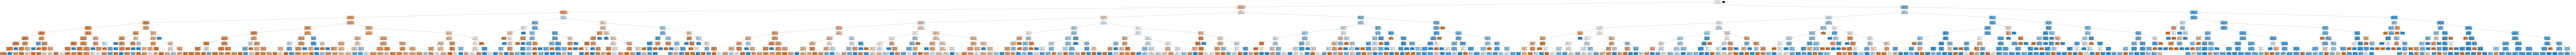

In [24]:
dot_data = StringIO()  
export_graphviz(dt_basic, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [186]:
# Export the decision tree to DOT format
dot_data = StringIO()
export_graphviz(dt_basic, out_file=dot_data, feature_names=features, filled=True, rounded=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [25]:
dt_basic.get_params()
#params = model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

HyperParameters Training

In [27]:
parameters={'max_depth': range(1,10)}

In [29]:
n_folds=5   #

k folds divides the datapoints lets say 1000 in k times (10), so every fold will have 100 datapoints. Now, we build k models, each model corresponding to the kth fold in the test set and the rest of the k-1 folds as the training set. The final predictions are the average value of the k models that you build for a particular set of parameters.
In this way, you ensure that the bias between the train and test dataset upon split is not there.

In [30]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [32]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [39]:
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

In [41]:
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [42]:
score=tree.cv_results_

In [44]:
print(score)

{'mean_fit_time': array([0.0962563 , 0.12469597, 0.18570032, 0.24564872, 0.27733088,
       0.32304773, 0.36533046, 0.41641502, 0.45723677]), 'std_fit_time': array([0.02382622, 0.00531619, 0.0081137 , 0.00791202, 0.0081536 ,
       0.00791326, 0.00582047, 0.00997126, 0.01041657]), 'mean_score_time': array([0.00349884, 0.00877109, 0.01378794, 0.00900297, 0.01280155,
       0.01057296, 0.01466632, 0.01443782, 0.00821323]), 'std_score_time': array([0.00674885, 0.0072273 , 0.00732753, 0.00680498, 0.00488201,
       0.00599342, 0.00648144, 0.00591782, 0.00684016]), 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}], 'split0_test_score': array([0.71160714, 0

In [47]:
score=pd.DataFrame(score)

In [50]:
score.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.096256      0.023826         0.003499        0.006749   
1       0.124696      0.005316         0.008771        0.007227   
2       0.185700      0.008114         0.013788        0.007328   
3       0.245649      0.007912         0.009003        0.006805   
4       0.277331      0.008154         0.012802        0.004882   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.711607           0.718839   
1               2  {'max_depth': 2}           0.711607           0.718839   
2               3  {'max_depth': 3}           0.724375           0.731071   
3               4  {'max_depth': 4}           0.730625           0.731161   
4               5  {'max_depth': 5}           0.727679           0.734464   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.708661           0.711875  ...         0.713946        0.004116   
1           0.708661           0.711875  ...         0.713946        0.004116   
2           0.719554           0.726696  ...         0.725875        0.003825   
3           0.724911           0.727589  ...         0.729250        0.002627   
4           0.726696           0.727500  ...         0.729786        0.003129   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.714531            0.712723   
1                8            0.714531            0.712723   
2                7            0.726250            0.724576   
3                3            0.731830            0.729688   
4                2            0.733080            0.733371   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.715268            0.714464            0.712746   
1            0.715268            0.714464            0.712746   
2            0.727455            0.725670            0.725424   
3            0.732098            0.730402            0.729308   
4            0.735558            0.735558            0.733080   

   mean_train_score  std_train_score  
0          0.713946         0.001029  
1          0.713946         0.001029  
2          0.725875         0.000956  
3          0.730665         0.001121  
4          0.734129         0.001171  

[5 rows x 21 columns]

In [58]:
score[['param_max_depth','mean_train_score','mean_test_score']]

param_max_depth  mean_train_score  mean_test_score
0               1          0.713946         0.713946
1               2          0.713946         0.713946
2               3          0.725875         0.725875
3               4          0.730665         0.729250
4               5          0.734129         0.729786
5               6          0.735848         0.730804
6               7          0.739781         0.729196
7               8          0.743714         0.729214
8               9          0.749942         0.727125

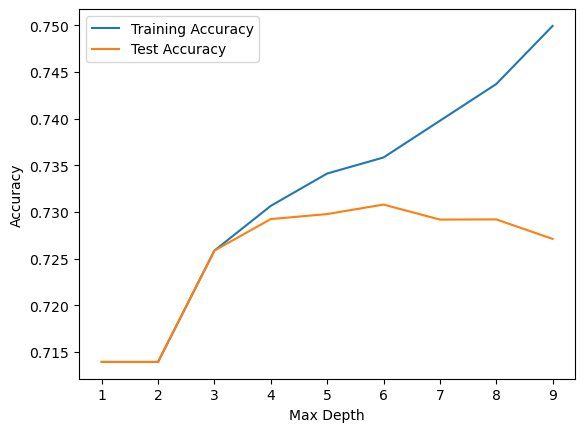

In [64]:
plt.figure()
plt.plot(score['param_max_depth'],score['mean_train_score'],label="Training Accuracy")
plt.plot(score['param_max_depth'],score['mean_test_score'],label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
tree.best_params_       # note both are coming same from graph optimal value is 6

{'max_depth': 6}

New Parameter Tunning- Min_Sample_leaf

In [92]:
parameters={'min_samples_leaf': range(10,200,20)}

In [93]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [94]:
n_folds=5

In [95]:
tree2=GridSearchCV(dtree,parameters,cv=n_folds,scoring="accuracy",return_train_score=True)

In [96]:
tree2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(10, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [97]:
score2=tree2.cv_results_

In [98]:
tree2.best_params_

{'min_samples_leaf': 170}

In [99]:
score2

{'mean_fit_time': array([0.36680131, 0.29894986, 0.26937094, 0.25559168, 0.24061661,
        0.23144822, 0.22220607, 0.21647544, 0.20878668, 0.20001402]),
 'std_fit_time': array([0.01233797, 0.00427661, 0.00379338, 0.00365829, 0.00224443,
        0.00496746, 0.00284725, 0.00342079, 0.00205114, 0.00291917]),
 'mean_score_time': array([0.00738277, 0.00705514, 0.00635543, 0.00606518, 0.00586448,
        0.00600266, 0.006038  , 0.00565424, 0.0056025 , 0.00575056]),
 'std_score_time': array([4.36279150e-04, 6.35618309e-04, 3.83479860e-04, 2.36301916e-04,
        1.91281822e-04, 1.01264766e-05, 1.37939801e-04, 3.48037970e-04,
        4.15464650e-04, 4.06716789e-04]),
 'param_min_samples_leaf': masked_array(data=[10, 30, 50, 70, 90, 110, 130, 150, 170, 190],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 10},
  {'min_samples_leaf': 30},
  {'min_s

In [100]:
score2=pd.DataFrame(score2)

In [101]:
score2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.366801      0.012338         0.007383        0.000436   
1       0.298950      0.004277         0.007055        0.000636   
2       0.269371      0.003793         0.006355        0.000383   
3       0.255592      0.003658         0.006065        0.000236   
4       0.240617      0.002244         0.005864        0.000191   

  param_min_samples_leaf                    params  split0_test_score  \
0                     10  {'min_samples_leaf': 10}           0.684107   
1                     30  {'min_samples_leaf': 30}           0.719911   
2                     50  {'min_samples_leaf': 50}           0.723661   
3                     70  {'min_samples_leaf': 70}           0.724821   
4                     90  {'min_samples_leaf': 90}           0.729107   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.680268           0.683125           0.675804  ...   
1           0.720000           0.716339           0.714375  ...   
2           0.727232           0.723214           0.723304  ...   
3           0.730179           0.721786           0.728304  ...   
4           0.733661           0.722054           0.729286  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.679500        0.003918               10            0.803839   
1         0.716857        0.002678                9            0.759665   
2         0.724571        0.001557                8            0.750915   
3         0.725911        0.002974                7            0.746071   
4         0.728625        0.003725                6            0.744040   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.803080            0.802210            0.804554   
1            0.760112            0.759978            0.761228   
2            0.750379            0.751138            0.751652   
3            0.746607            0.747299            0.748705   
4            0.743571            0.745313            0.745335   

   split4_train_score  mean_train_score  std_train_score  
0            0.802813          0.803299         0.000817  
1            0.760335          0.760263         0.000529  
2            0.752009          0.751219         0.000568  
3            0.746652          0.747067         0.000907  
4            0.743259          0.744304         0.000869  

[5 rows x 21 columns]

In [103]:
score2[['param_min_samples_leaf','mean_train_score','mean_test_score']]

param_min_samples_leaf  mean_train_score  mean_test_score
0                     10          0.803299         0.679500
1                     30          0.760263         0.716857
2                     50          0.751219         0.724571
3                     70          0.747067         0.725911
4                     90          0.744304         0.728625
5                    110          0.742830         0.730357
6                    130          0.741406         0.730893
7                    150          0.740420         0.731268
8                    170          0.739473         0.731357
9                    190          0.739187         0.731161

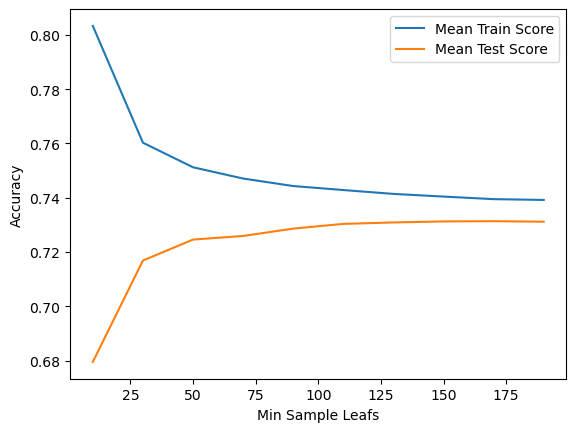

In [113]:
plt.figure()
plt.plot(score2['param_min_samples_leaf'],score2['mean_train_score'],label="Mean Train Score")
plt.plot(score2['param_min_samples_leaf'],score2['mean_test_score'],label="Mean Test Score")
plt.xlabel("Min Sample Leafs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Hypertune Multiple Parameters at once

In [115]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [123]:
mul_params={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,200,50),
    'min_samples_split':range(50,200,50),
    'criterion': ['gini','entorpy']
}

In [124]:
n_folds=5

In [125]:
tree=DecisionTreeClassifier()

In [126]:
dtree3=GridSearchCV(tree,mul_params,cv=n_folds,n_jobs=-1,)   # cv stands for cross validation folds, n jobs=-1 enables parallel processingdtr

In [127]:
dtree3.fit(x_train,y_train)

C:\Users\bharat.sakarwal\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bharat.sakarwal\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bharat.sakarwal\AppData\Local\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\bharat.sakarwal\AppData\Local\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    se

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50)})

In [130]:
score3=dtree3.cv_results_

In [132]:
score3=pd.DataFrame(score3)

In [134]:
score3.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.447055      0.057449         0.023712        0.007295   
1       0.429570      0.025214         0.021780        0.005710   
2       0.575685      0.140416         0.028251        0.017695   
3       0.522528      0.040632         0.020702        0.007867   
4       0.611622      0.150110         0.015724        0.002317   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     50   
1            gini               5                     50   
2            gini               5                     50   
3            gini               5                    100   
4            gini               5                    100   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                     150  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
3                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
4                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.728036           0.734643           0.727143           0.727321   
1           0.728036           0.734643           0.727143           0.727321   
2           0.728036           0.734643           0.727143           0.727321   
3           0.728036           0.735536           0.727143           0.727321   
4           0.728036           0.735536           0.727143           0.727321   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.732589         0.729946        0.003080                7  
1           0.732589         0.729946        0.003080                7  
2           0.732589         0.729946        0.003080                7  
3           0.731339         0.729875        0.003211               10  
4           0.731339         0.729875        0.003211               10

In [144]:
dtree3.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 150,
 'min_samples_split': 50}

In [169]:
dtree3.best_score_

0.7316071428571429

In [151]:
best_tree=dtree3.best_estimator_

In [174]:
type(best_tree)
best_tree

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150, min_samples_split=50)

In [175]:
best_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150, min_samples_split=50)

In [165]:
best_tree.score(x_test,y_test)

0.7272857142857143

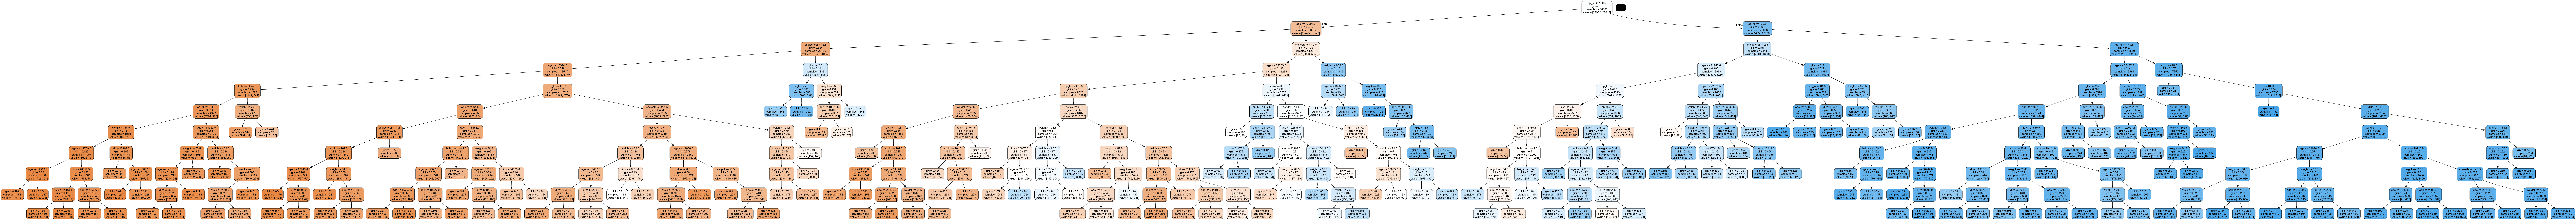

In [177]:
dot_data = StringIO()  
export_graphviz(best_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Create Less Complex Tree

In [ ]:
{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 150,
 'min_samples_split': 50}

In [179]:
Tree4=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=150,min_samples_split=50)

In [181]:
Tree4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=150, min_samples_split=50)

In [182]:
Tree4.score(x_test,y_test)

0.7254285714285714

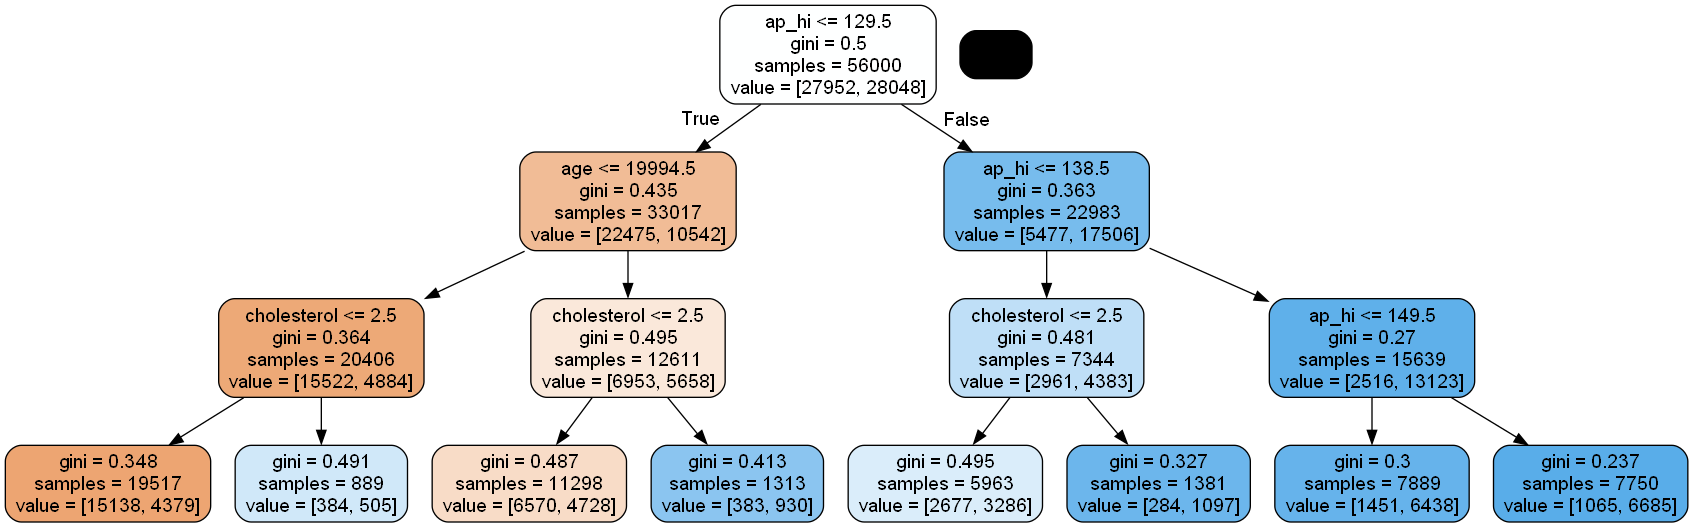

In [183]:
dot_data = StringIO()  
export_graphviz(Tree4, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [185]:
y_pred=Tree4.predict(x_test)

In [186]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [189]:
metrics.accuracy_score(y_test,y_pred)

0.7254285714285714

In [188]:
col_labels=['Predicted 0','Predicted 1']
row_labels=['Actual 0','Actual 1']
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,columns=col_labels,index=row_labels)
cm_df

Predicted 0  Predicted 1
Actual 0         5503         1566
Actual 1         2278         4653

In [190]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.6713316981676526

In [192]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.748191027496382

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7069
           1       0.75      0.67      0.71      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.73      0.72     14000

